<a href="https://colab.research.google.com/github/Tapanmittal13/Data_Science/blob/master/1%2C2%2C3%2C4_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vanilla Network**

**Objective:**
Build a network using learnt techniques of convolution block & Transition block.
Controlling params is not on priority right now.
Try and make a robust model,which on continued training for large no. of epochs can reach the target accuracy of 99.4.

**Steps Followed:**
1. 1x1 
2. Max Pooling

**Observation:**
As we discussed in class, i see a difference of 99.59-99.02=0.57 between training & val accuracy.
That means if my training acc reaches 99.97, I can get 99.4 val accuracy.

But i noticed one thing, if i run this iteration at diff times,i somethimes get accuracy less than 99 and at times 99.2 too.
According to the session,the vanilla network i have built above is similar to your network but this doesnt seem to be stable if it is fluctuating so much.

I will for next iteration  to control the no of  parameters to the given number.

********************************************************************************

**Objective:** 

Try and get closer to number of parameter constraint & reduce the gap in accuracy too.


**3 Steps Followed:**

1. Reduce the number of params by decreasing the number of kernels
2. Add Batch Normalisation to increase the accuracy
3. Increase the batch size from 32 to 64.

**Observation:**

Parameters dropped from 53k to 16.5k,but our validation accuracy took a hit inspite of doing BN & increasing batch size.
The gap between training and validation accuracy widened more.
On the contrary, I was expecting same accuracy post 10 epochs as last iteration since here also last epoch is giving 99.59 accuracy.
But to my suprise it dropped further.
I think decrease in params striked a sort of balance with BN.

********************************************************************************


**Objective:** 

Trying to  reduce the params by around 1.5k and make sure to Increase the  accuracy and try to reduce the gap between training & Validation Accuracy.

**3 Steps Followed:**

1. Add Dropouts in transition layer or convolution or both
2. Increase the number of epochs from 10 to 20 & included validation accuracy watchout too to get better understanding of the change per epoch.
3. Reduce the number of params by reducing kernels in the layer in order to match the assignment criteria

**Observation:**
i achieved the accuracy of 99.4 within 15k params but not convinced.
First time I saw validation accuracy more than training accuracy and I was in a state of overwhelm.
This trend continued till the end. As per the teaching, dropout helps to reduce the gap between both but seeing this trend i got confused.


*******************************************************************************


**Objective:** 
Beat my own model in last iteration

**3 Steps Followed:**

1. LR Scheduler with picking best epoch to evalua
te the model
2. Further reduce the number of params & train for 10 epochs
3. Increase the batch size from 64 to 128

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


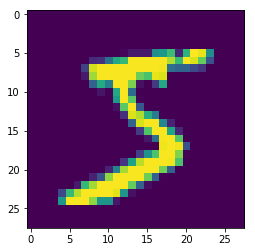

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation

model = Sequential()

#Transition block
model.add(Convolution2D(10,3,activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())

#Convolution block
model.add(Convolution2D(10,3,activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, activation='relu')) #22
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Transition block
model.add(MaxPooling2D(2,2)) #11
model.add(Convolution2D(10,1,activation='relu')) #11
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Convolution block
model.add(Convolution2D(10,3,activation='relu')) #9
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, activation='relu')) #7
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Transition block

model.add(Convolution2D(10,1,activation='relu')) #7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10,7))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 20)        1820      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 20)        80        
__________

**Code below helps to take the best epoch amongst all and then evaluate the model based on it.**

**This part of code holds the best epoch in the memory rather than saving it**

In [0]:
import numpy as np
from keras.callbacks import Callback
class GetBest(Callback):
    """Get the best model at the end of training.
	# Arguments
        monitor: quantity to monitor.
        verbose: verbosity mode, 0 or 1.
        mode: one of {auto, min, max}.
            The decision
            to overwrite the current stored weights is made
            based on either the maximization or the
            minimization of the monitored quantity. For `val_acc`,
            this should be `max`, for `val_loss` this should
            be `min`, etc. In `auto` mode, the direction is
            automatically inferred from the name of the monitored quantity.
        period: Interval (number of epochs) between checkpoints.
	# Example
		callbacks = [GetBest(monitor='val_acc', verbose=1, mode='max')]
		mode.fit(X, y, validation_data=(X_eval, Y_eval),
                 callbacks=callbacks)
    """

    def __init__(self, monitor='val_loss', verbose=0,
                 mode='auto', period=1):
        super(GetBest, self).__init__()
        self.monitor = monitor
        self.verbose = verbose
        self.period = period
        self.best_epochs = 0
        self.epochs_since_last_save = 0

        if mode not in ['auto', 'min', 'max']:
            warnings.warn('GetBest mode %s is unknown, '
                          'fallback to auto mode.' % (mode),
                          RuntimeWarning)
            mode = 'auto'

        if mode == 'min':
            self.monitor_op = np.less
            self.best = np.Inf
        elif mode == 'max':
            self.monitor_op = np.greater
            self.best = -np.Inf
        else:
            if 'acc' in self.monitor or self.monitor.startswith('fmeasure'):
                self.monitor_op = np.greater
                self.best = -np.Inf
            else:
                self.monitor_op = np.less
                self.best = np.Inf
                
    def on_train_begin(self, logs=None):
        self.best_weights = self.model.get_weights()

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epochs_since_last_save += 1
        if self.epochs_since_last_save >= self.period:
            self.epochs_since_last_save = 0
            #filepath = self.filepath.format(epoch=epoch + 1, **logs)
            current = logs.get(self.monitor)
            if current is None:
                warnings.warn('Can pick best model only with %s available, '
                              'skipping.' % (self.monitor), RuntimeWarning)
            else:
                if self.monitor_op(current, self.best):
                    if self.verbose > 0:
                        print('\nEpoch %05d: %s improved from %0.5f to %0.5f,'
                              ' storing weights.'
                              % (epoch + 1, self.monitor, self.best,
                                 current))
                    self.best = current
                    self.best_epochs = epoch + 1
                    self.best_weights = self.model.get_weights()
                else:
                    if self.verbose > 0:
                        print('\nEpoch %05d: %s did not improve' %
                              (epoch + 1, self.monitor))            
                    
    def on_train_end(self, logs=None):
        if self.verbose > 0:
            print('Using epoch %05d with %s: %0.5f' % (self.best_epochs, self.monitor,
                                                       self.best))
        self.model.set_weights(self.best_weights)

In [0]:
# model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

In [0]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
callbacks = [GetBest(monitor='val_acc', verbose=1, mode='max'),LearningRateScheduler(scheduler, verbose=1)]

In [0]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=10,  validation_data=(X_test, Y_test),verbose=1,callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 8s 139us/step - loss: 0.5263 - acc: 0.9079 - val_loss: 0.1536 - val_acc: 0.9771

Epoch 00001: val_acc improved from -inf to 0.97710, storing weights.
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 4s 74us/step - loss: 0.1778 - acc: 0.9760 - val_loss: 0.1190 - val_acc: 0.9817

Epoch 00002: val_acc improved from 0.97710 to 0.98170, storing weights.
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 4s 72us/step - loss: 0.1209 - acc: 0.9827 - val_loss: 0.0753 - val_acc: 0.9865

Epoch 00003: val_acc improved from 0.98170 to 0.98650, storing weights.
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [=====

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03835695506036282, 0.9918]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[6.0573377e-04 2.7405948e-04 6.6508609e-04 2.3384187e-04 4.6672332e-04
  2.2506159e-04 5.6096632e-04 9.9641126e-01 3.5720086e-04 1.9998083e-04]
 [1.3823593e-03 9.8453322e-04 9.9191499e-01 3.2501589e-04 1.5967700e-04
  2.0889261e-04 4.0864372e-03 5.2665483e-04 1.3834637e-04 2.7299064e-04]
 [3.9027020e-04 9.9207002e-01 4.8599567e-04 1.3337785e-03 8.9304941e-04
  1.3012351e-03 9.4977760e-04 8.7888422e-04 8.6687435e-04 8.3015225e-04]
 [9.8872107e-01 7.5721485e-04 1.0981981e-03 6.5815705e-04 5.7924970e-04
  2.6158238e-04 5.1141479e-03 9.1424509e-04 8.5792062e-04 1.0382950e-03]
 [4.6434923e-04 4.9977575e-04 2.0057907e-04 1.6042606e-04 9.9607593e-01
  1.3290533e-04 3.6851416e-04 1.1730353e-04 4.2600231e-04 1.5542994e-03]
 [3.1812335e-04 9.9504340e-01 5.3195219e-04 3.8174147e-04 5.9416692e-04
  6.9843326e-04 6.0831837e-04 5.6401140e-04 6.7640998e-04 5.8343232e-04]
 [3.0542249e-04 4.8427211e-04 9.4948709e-04 4.0484698e-05 9.9354303e-01
  4.6067836e-04 1.9228122e-04 4.1694543e-04 3.3089132e-03 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

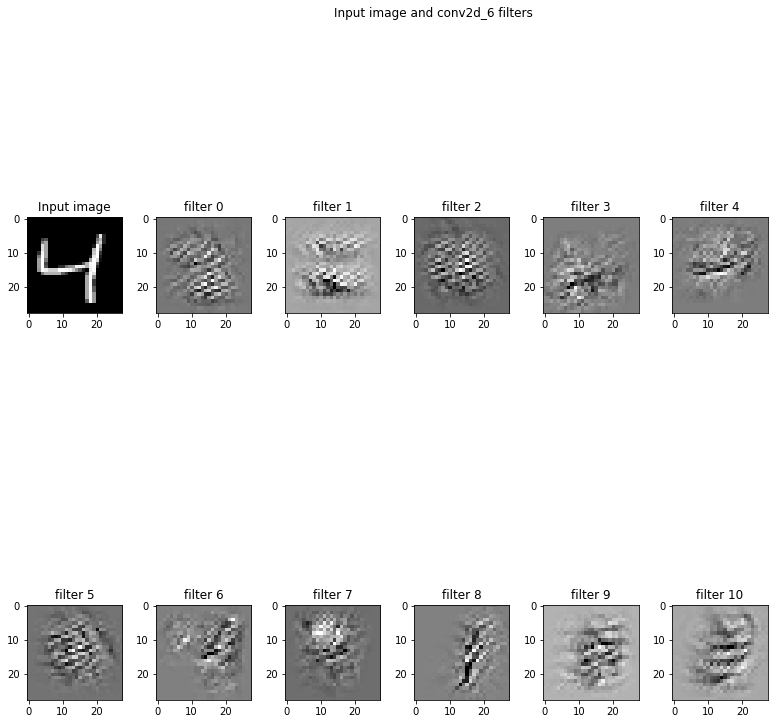

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_6'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 2,4
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

**Observation:**

The desire to beat my own model and accuracy in last iteration, I introduced learning rate scheduler to my model.
And I thought of running for lesser number of epochs to put more of challenge and see if I can touch the magical number of 352(oops!! Politics on mind).

Anyways I was too ambitious and was caught off gaurd when I couldnt get my desired output. 
The decreasing LR certainly helped but here again I see validation accuracy more than training accuracy.